# Team Miss Meteo

## Data analysis

In [44]:
path="./../data_meteo/"
meteo=read.table(paste(path,"train_1.csv",sep=""),sep=";",header=T)
# Vérification du contenu
summary(meteo)

         date          insee                      tH2_obs    
 2014-01-01:   7   Min.   : 6088001   9,89999961853027:  57  
 2014-01-02:   7   1st Qu.:31069001   10,5            :  53  
 2014-01-03:   7   Median :35281001   10,8000001907349:  53  
 2014-01-04:   7   Mean   :43900001   10,3000001907349:  52  
 2014-01-05:   7   3rd Qu.:67124001   10,8999996185303:  52  
 2014-01-06:   7   Max.   :75114001   11,5            :  52  
 (Other)   :6125                      (Other)         :5848  
              capeinsSOL0                   ciwcH20    
 0                  :1520   0                   :6088  
                    : 581                       :   7  
 0,00659051296497594:   8   1,03856912374592e-08:   1  
 0,00491036777566192:   5   1,06991488627462e-07:   1  
 0,0131810259299519 :   5   1,07143592805376e-05:   1  
 0,0147311033269857 :   5   1,10311545987089e-09:   1  
 (Other)            :4043   (Other)             :  68  
                 clwcH20      ddH10_rose4               


- insee 	Informe sur la localisation de la station :
- Numéro 	Station
    - 06088001 	Nice
    - 31069001 	Toulouse Blagnac
    - 33281001 	Bordeaux-Mérignac
    - 35281001 	Rennes
    - 59343001 	Lille Lesquin
    - 67124001 	Strasbourg Entzheim
    - 75114001 	Paris-Montsouris
- tH2_obs 	Observation de la température à 2 mètres in situ- au point station (prédictant)
- ech 	Echéance de validité
- capeinsSOL0 	Energie potentielle convective
- ciwcH20 	Fraction de glace nuageuse à 20 mètres
- clwcH20 	Fraction d'eau nuageuse à 20 mètres
- nH20 	Fraction nuageuse à 20 mètres
- pMER0 	Pression au niveau de la mer
- rr1SOL0 	Précipitation horaire au niveau du sol
- rrH20 	Précipitation horaire à 20 mètres
- tpwHPA850 	Température potentielle au niveau 850 hPa
- ux1H10 	Rafale 1 minute du vent à 10 mètres composante zonale
- vapcSOL0 	Colonne de vapeur d'eau
- vx1H10 	Rafale 1 minute du vent à 10 mètres composante verticale
- ddH10_rose4 	Direction du vent à 10 mètres en rose4
- ffH10 	Force du vent à 10 mètres en m/s
- flir1SOL0 	Flux Infra-rouge en J/m2
- fllat1SOL0 	Flux de chaleur latente en J/m2
- flsen1SOL0 	Flux de chaleur sensible en J/m2
- flvis1SOL0 	Flux visible en J/m2
- hcoulimSOL0 	Hauteur de la couche limite en mètres
- huH2 	Humidité 2mètres en %
- iwcSOL0 	Réservoir neige kg/m2 (équivalent en eau liquide des chutes de neige)
- nbSOL0_HMoy 	Nébulosité basse (moyenne sur les 6 points de grille autour de la station) (fraction en octat du ciel occulté)
- ntSOL0_HMoy 	Nébulosité totale (moyenne sur les 6 points de grille autour de la station)
- tH2 	Température à 2 mètres du modèle AROME
- tH2_VGrad_2.100 	Gradient vertical de température entre 2 mètres et 100 mètres
- tH2_XGrad 	Gradient zonal de température à 2 mètres
- tH2_YGrad 	Gradient méridien de température à 2 mètres
- mois 	Le mois

In [46]:
for (name in colnames(meteo)) {
if (name=='date' | name=='mois') {} else 
    {meteo[,name]=as.numeric(gsub(",", ".", meteo[,name]))}
}
summary(meteo)

         date          insee             tH2_obs       capeinsSOL0      
 2014-01-01:   7   Min.   : 6088001   Min.   :-6.10   Min.   :   0.000  
 2014-01-02:   7   1st Qu.:31069001   1st Qu.: 6.70   1st Qu.:   0.000  
 2014-01-03:   7   Median :35281001   Median :10.50   Median :   1.029  
 2014-01-04:   7   Mean   :43900001   Mean   :10.71   Mean   :  37.366  
 2014-01-05:   7   3rd Qu.:67124001   3rd Qu.:14.50   3rd Qu.:  20.049  
 2014-01-06:   7   Max.   :75114001   Max.   :29.80   Max.   :1083.809  
 (Other)   :6125                                      NA's   :581       
    ciwcH20           clwcH20         ddH10_rose4        ffH10         
 Min.   :0.0e+00   Min.   :0.00000   Min.   :1.000   Min.   : 0.00823  
 1st Qu.:0.0e+00   1st Qu.:0.00000   1st Qu.:2.000   1st Qu.: 1.73647  
 Median :0.0e+00   Median :0.00000   Median :3.000   Median : 2.59133  
 Mean   :0.0e+00   Mean   :0.00001   Mean   :2.779   Mean   : 3.02133  
 3rd Qu.:0.0e+00   3rd Qu.:0.00000   3rd Qu.:4.000   3rd

In [32]:
#attributes(meteo)
meteo$names
mode(meteo)
#for (name in meteo$names) {cat(name)}

NULL

[1] "list"

In [4]:
# if needed to rescale
# rozone=scale(ozone[,])

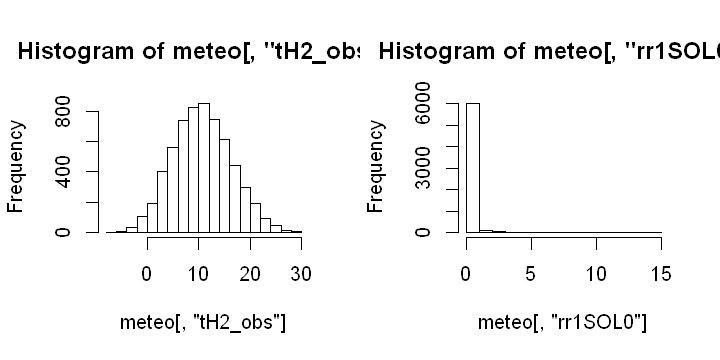

In [47]:
par(mfrow=c(1,2))
options(repr.plot.width=6, repr.plot.height=3)
hist(meteo[,"tH2_obs"])
hist(meteo[,"rr1SOL0"])